# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [65]:
import pandas as pd

In [66]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [67]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [68]:
# You will need to import numpy

In [69]:
# You can use this function in your code to find the log of distance:

# np.log10()
gaia_G=df["G"].loc[df["group_id"]==2]
gaia_D=df["distance"].loc[df["group_id"]==2]
gaia_J=df["J"].loc[df["group_id"]==2]

In [70]:
absolute_m = gaia_G - 5 * np.log10(gaia_D)+5
absolute_m.head(5)

276    3.117943
277    6.369445
278    4.520155
279    5.631102
280    5.734546
dtype: float64

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl 
%matplotlib inline

In [72]:
df = pd.read_csv("oh_table.csv")

In [73]:
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [74]:
absolute_m = gaia_G - 5 * np.log10(gaia_D)+5
absolute_m.head(5)

276    3.117943
277    6.369445
278    4.520155
279    5.631102
280    5.734546
dtype: float64

In [75]:
df.mean()

row_id            5.302500e+03
tgas_source_id    3.564987e+18
ra                1.709493e+02
dec              -3.983649e+00
parallax          8.909725e+00
distance          1.529422e+02
G                 9.700343e+00
J                 8.718671e+00
rv                5.561688e+00
erv               2.238066e+00
group_id          1.961924e+03
group_size        1.028682e+01
dtype: float64

In [76]:
len(df)

10606

In [77]:
color = gaia_G - gaia_J

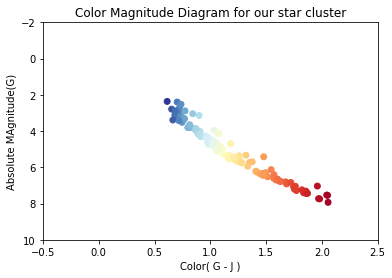

In [78]:
cm = plt.cm.get_cmap("RdYlBu_r")
plt.scatter(color, absolute_m, c = color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.ylim([-2, 10])
plt.xlim([-0.5, 2.5])
plt.xlabel("Color( G - J )")
plt.ylabel("Absolute MAgnitude(G)")
plt.title("Color Magnitude Diagram for our star cluster")
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [79]:
SunJ = 3.64
SunG = 5.12
sun_color=SunG-SunJ

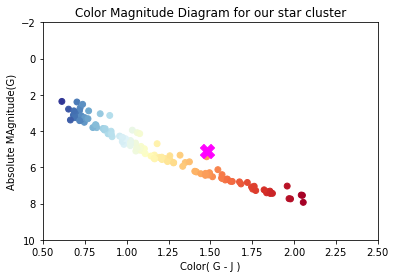

In [80]:
cm = plt.cm.get_cmap("RdYlBu_r")
plt.scatter(color, absolute_m, c = color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(sun_color, SunG, c="magenta", s=200, marker="X" )
plt.ylim([-2, 10])
plt.xlim([0.5, 2.5])
plt.xlabel("Color( G - J )")
plt.ylabel("Absolute MAgnitude(G)")
plt.title("Color Magnitude Diagram for our star cluster")
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 2: Add a colormap to your diagram

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import csv

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

In [82]:
import matplotlib.pyplot as plt
import pandas as pd 

In [83]:
df = pd.read_csv("oh_table.csv")

In [84]:
df.head(5)

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


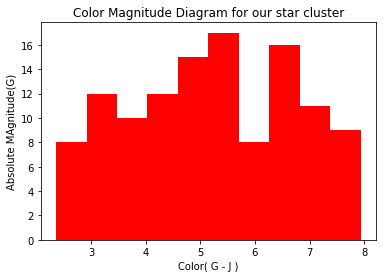

In [90]:
plt.hist(absolute_m, color = "red")
plt.title("Color Magnitude Diagram for our star cluster")
plt.ylabel("Absolute MAgnitude(G)")
plt.xlabel("Color( G - J )")
plt.show()


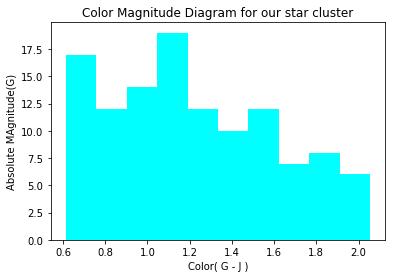

In [88]:
plt.hist(color.dropna(), color = "cyan")
plt.title("Color Magnitude Diagram for our star cluster")
plt.ylabel("Absolute MAgnitude(G)")
plt.xlabel("Color( G - J )")
plt.show()

